# Advent of Code: 2022

In [2]:
from aocd import get_data
import re

def uints(input: str) -> list[int]:
    return [int(i) for i in re.findall(r"\d+", input)]

def ints(input: str) -> list[int]:
    return [int(i) for i in re.findall(r"-?\d+", input)]

## Day 1

In [2]:
data = get_data(day=1).split("\n\n")
data = [group.splitlines() for group in data]

### Part 1

In [3]:
sums = [sum([int(cal) for cal in group]) for group in data]
max(sums)

71471

### Part 2

In [4]:
sums.sort()

sum(sums[-3:])

211189

## Day 2

In [5]:
data = get_data(day=2)
lines = data.splitlines()
rounds = [line.split(" ") for line in lines]

### Part 1

In [6]:
def to_rps(char):
    match char:
        case 'A' | 'X':
            return 0
        case 'B' | 'Y':
            return 1
        case 'C' | 'Z':
            return 2

def do_round(round):
    [a, b] = [to_rps(char) for char in round]

    if a == b:
        return 3 + b + 1
    if b == (a + 1) % 3:
        return 6 + b + 1
    else:
        return 0 + b + 1
    

sum([do_round(round) for round in rounds])

15691

### Part 2

In [7]:
def to_mod_rps(a, b):
    a, b = to_rps(a), to_rps(b)
    newb = (a + b - 1) % 3

    return newb + 4 + (b - 1) * 3

sum([to_mod_rps(a, b) for [a, b] in rounds])

12989

## Day 3

In [8]:
data = get_data(day=3)
lines = data.splitlines()

### Part 1

In [9]:
def find_dupe(line: str):
    first, second = line[:len(line)//2], line[len(line)//2:]
    int = set(first).intersection(set(second))
    return ord(int.pop())

def priority(char: int):
    if char in range(ord('a'), ord('z') + 1):
        return char - ord('a') + 1
    else:
        return char - ord('A') + 27

sum([priority(find_dupe(line)) for line in lines])

8053

### Part 2

In [10]:
from more_itertools import chunked

def find_in_group(group):
    [a, b, c] = group
    return priority(ord(set(a).intersection(set(b)).intersection(set(c)).pop()))

sum([find_in_group(group) for group in chunked(lines, 3)])

2425

## Day 4

In [11]:
data = get_data(day=4)
lines = data.splitlines()
pairs = [uints(line) for line in lines]

### Part 1

In [12]:
def contains(pair):
    a, b, c, d = pair 
    return a <= c and b >= d or a >= c and b <= d

len([pair for pair in pairs if contains(pair)])

448

### Part 2

In [13]:
def overlaps(pair):
    a, b, c, d = pair 
    return a <= d and b >= c or a >= d and b <= c

len([pair for pair in pairs if overlaps(pair)])

794

## Day 5

In [14]:
from collections import defaultdict

data = get_data(day=5)
stack, moves = data.split("\n\n")
stack_lines = stack.splitlines()

orig_stacks = defaultdict(list)

for line in stack_lines[:-1]:
    s = 1
    for i in range(1, len(line), 4):
        crate = line[i]
        if crate != ' ':
            orig_stacks[s].insert(0, crate)
        s += 1

moves = [ints(move) for move in moves.splitlines()]

### Part 1

In [15]:
from copy import deepcopy

stacks = deepcopy(orig_stacks)

for cnt, fr, to in moves:
    for i in range(0, cnt):
        stacks[to].append(stacks[fr].pop())

out = ""
for k in sorted(stacks):
    out += stacks[k][-1]

out

'QNHWJVJZW'

### Part 2

In [16]:
from copy import deepcopy

stacks = deepcopy(orig_stacks)

for cnt, fr, to in moves:
    stacks[to] += stacks[fr][-cnt:]
    stacks[fr] = stacks[fr][:-cnt]

out = ""
for k in sorted(stacks):
    out += stacks[k][-1]

out

'BPCZJLFJW'

## Day 6

In [17]:
data = get_data(day=6)

### Part 1

In [18]:
from more_itertools import windowed

def find_uniq(num):
    for i, window in enumerate(windowed(data, num)):
        if len(set(window)) == num:
            return i + num

find_uniq(4)

1042

### Part 2

In [19]:
find_uniq(14)

2980

## Day 7

In [20]:
from dataclasses import dataclass

lines = get_data(day=7).splitlines()

@dataclass
class Dir:
    size: int
    children: list[any]
    parent: any

    def add(self, size):
        self.size += size
        if self.parent:
            self.parent.add(size)

root = Dir(0, [], None)
cur = None

for line in lines:
    if line.startswith("$"):
        if line == "$ ls":
            continue
        [_, cmd, file] = line.split()
        match cmd, file:
            case "cd", "/":
                cur = root
            case "cd", "..":
                cur = cur.parent
            case "cd", _:
                new_dir = Dir(0, [], cur)
                cur.children.append(new_dir)
                cur = new_dir
    else:
        size = ints(line)
        if not size:
            continue
        cur.add(size[0])

### Part 1

In [21]:
def total_dirs(dir):
    s = 0
    if dir.size < 100000:
        s += dir.size
    
    s += sum([total_dirs(child) for child in dir.children])
    return s

total_dirs(root)

1432936

### Part 2

In [22]:
free = 70000000 - root.size
needed = 30000000 - free

def find_smallest(dir):
    smallest = [find_smallest(child) for child in dir.children]

    if dir.size > needed:
        smallest.append(dir.size)

    smallest = list(filter(None, smallest))

    if smallest:
        return min(smallest)
    else:
        return None

find_smallest(root)

272298

## Day 8

In [23]:
data = get_data(day=8)
forest = [[int(c) for c in line] for line in data.splitlines()]
width = len(forest[0])
height = len(forest)

### Part 1

In [24]:
def in_range(x, y):
    return x >= 0 and y >= 0 and x < width and y < height

def visible_from_edge(visible, pos, dir):
    (x, y), (dx, dy), max = pos, dir, 0
    visible.add(pos)
    while in_range(x, y):
        height = forest[y][x]
        if height > max:
            max = height
            visible.add((x, y))
        x += dx
        y += dy

def each_direction(result, func):
    for x in range(0, width):
        func(result, (x, 0), (0, 1))
        func(result, (x, height - 1), (0, -1))

    for y in range(0, height):
        func(result, (0, y), (1, 0))
        func(result, (width - 1, y), (-1, 0))

visible = set()
each_direction(visible, visible_from_edge)
len(visible)

1827

### Part 2

In [25]:
def visible_from_tree(scores, pos, dir):
    (x, y), (dx, dy) = pos, dir
    i, stack = 0, [(10, 0)]
    
    while in_range(x, y):
        height = forest[y][x]

        while stack[-1][0] < height:
            stack.pop()

        scores[(x, y)] *= i - stack[-1][1]
        stack.append((height, i))

        i += 1
        x += dx
        y += dy

scores = defaultdict(lambda: 1)
each_direction(scores, visible_from_tree)
max(scores.values())

335580

## Day 9

In [26]:
data = get_data(day=9)
lines = data.splitlines()
moves = [[d, int(steps)] for [d, steps] in [line.split() for line in lines]]

### Part 1

In [27]:
import numpy as np

def simulate_rope(n):
    visited = set()
    rope = np.zeros((n, 2), dtype=int)

    for m in moves:
        for _ in range(m[1]):
            match m[0]:
                case 'U':
                    rope[0, 1] -= 1
                case 'D':
                    rope[0, 1] += 1
                case 'L':
                    rope[0, 0] -= 1
                case 'R':
                    rope[0, 0] += 1
            
            for i in range(n - 1):
                head, tail = rope[i], rope[i + 1]
                dx, dy = head[0] - tail[0], head[1] - tail[1]

                if abs(dx) > 1 or abs(dy) > 1:
                    tail[0] += np.sign(dx)
                    tail[1] += np.sign(dy)

            visited.add(tuple(rope[-1]))
    
    return len(visited)

simulate_rope(2)

5695

### Part 2

In [28]:
simulate_rope(10)

2434

## Day 10

In [29]:
data = get_data(day=10)
program = [ints(line) for line in data.splitlines()]

### Part 1

In [30]:
class Cpu:
    def __init__(self, program):
        self.program = program
        self.cycle = 1
        self.adding = None
        self.pc = 0
        self.x = 1
    
    def tick(self):
        self.cycle += 1
        
        if self.adding:
            self.x += self.adding
            self.pc += 1
            self.adding = None
            return

        match self.program[self.pc]:
            case []:
                self.pc += 1
            case [num]:
                self.adding = num
    
signal = 0
cpu = Cpu(program)
for i in range(1, 221):
    if (i - 20) % 40 == 0:
        signal += cpu.x * cpu.cycle
    cpu.tick()

signal

12740

### Part 2

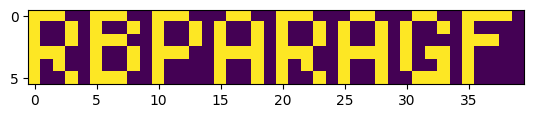

In [31]:
import matplotlib.pyplot as plt

cpu = Cpu(program)

pixels = np.zeros(240)

for i in range(0, 240):
    pos = (cpu.cycle - 1) % 40
    if abs(cpu.x - pos) <= 1:
        pixels[i] = 1
    cpu.tick()

picture = pixels.reshape((6, 40)) 

plt.imshow(picture)

## Day 11

In [32]:
from dataclasses import dataclass

@dataclass
class Monkey:
    items: list[int]
    operation: any
    test: int
    if_true: int
    if_false: int
    num_inspec: int = 0

def monkey(group):
    _, items, op, test, ift, iff = group.splitlines()
    items = ints(items)
    _, op = op.split("new = ")
    test = ints(test)[0]
    ift = ints(ift)[0]
    iff = ints(iff)[0]

    return Monkey(items, op, test, ift, iff)

data = get_data(day=11)
monkeys = [monkey(group) for group in data.split("\n\n")]

def simulate(monkeys, rounds, dampen):
    for round in range(0, rounds):
        for monkey in monkeys:
            while monkey.items:
                monkey.num_inspec += 1
                old = monkey.items.pop(0)
                new = eval(monkey.operation)
                new = dampen(new)
                if new % monkey.test == 0:
                    monkeys[monkey.if_true].items.append(new)
                else:
                    monkeys[monkey.if_false].items.append(new)

    monkeys.sort(key=lambda monkey: monkey.num_inspec)
    return monkeys[-2].num_inspec * monkeys[-1].num_inspec

### Part 1

In [33]:
import copy

simulate(copy.deepcopy(monkeys), 20, lambda item: item // 3)

118674

### Part 2

In [34]:
from math import prod

p = prod([monkey.test for monkey in monkeys])
simulate(copy.deepcopy(monkeys), 10000, lambda item: item % p)

32333418600

## Day 12

In [35]:
data = get_data(day=12)
grid = [list(line) for line in data.splitlines()]

height = len(grid)
width = len(grid[0])

start = None
dest = None
for y in range(height):
    for x in range(width):
        if grid[y][x] == 'S':
            start = (x, y)
            grid[y][x] = 'a'
        if grid[y][x] == 'E':
            dest = (x, y)
            grid[y][x] = 'z'


### Part 1

In [36]:
import heapq

def dijkstra(start, get_neighbors, is_success):
    visited = {start}
    heap = [(0, start)]

    while heap:
        (steps, next) = heapq.heappop(heap)

        if is_success(next):
            return steps

        for neighbor in get_neighbors(next):
            if not neighbor in visited:
                visited.add(neighbor)
                heapq.heappush(heap, (steps + 1, neighbor))

directions = [[0, 1], [0, -1],[1, 0],[-1, 0]]

def is_valid(x, y):
    return x >= 0 and y >= 0 and x < width and y < height

def can_step(source, dest):
    (x1, y1), (x2, y2) = source, dest
    return ord(grid[y1][x1]) >= ord(grid[y2][x2]) - 1

def neighbors(source):
    (x, y) = source
    all = [(x + dx, y + dy) for [dx, dy] in directions]
    return [(x, y) for (x, y) in all if is_valid(x, y) and can_step((x, y), source)]

dijkstra(dest, neighbors, lambda p: p == start)

481

### Part 2

In [37]:
dijkstra(dest, neighbors, lambda p: grid[p[1]][p[0]] == 'a')

480

## Day 13

In [38]:
data = get_data(day=13)
pairs = [(eval(first), eval(second)) for [first, second] in [group.splitlines() for group in data.split("\n\n")]]

### Part 1

In [39]:
def less(first, second):
    if isinstance(first, int) and isinstance(second, int):
        return second - first
    if isinstance(first, list) and isinstance(second, list):
        for i in range(min(len(first), len(second))):
            res = less(first[i], second[i])
            if res:
                return res
        return len(second) - len(first)
    if isinstance(first, int):
        return less([first], second)
    else:
        return less(first, [second])
        
index_sum = 0
for i in range(len(pairs)):
    if less(pairs[i][0], pairs[i][1]) > 0:
        index_sum += i + 1

index_sum

5682

### Part 2

In [40]:
all_packets = []

for pair in pairs:
    all_packets.append(pair[0])
    all_packets.append(pair[1])

count_first = 1
count_second = 1

for packet in all_packets:
    if less(packet, [[2]]) > 0:
        count_first += 1

all_packets.append([[2]])

for packet in all_packets:
    if less(packet, [[6]]) > 0:
        count_second += 1

count_first * count_second

20304

## Day 14

In [41]:
data = get_data(day=14)
lines = data.splitlines()
points = [line.split(" -> ") for line in lines]
paths = [[point.split(",") for point in segment] for segment in points]
paths = [[(int(x), int(y)) for [x, y] in path] for path in paths]

map = {}

for path in paths:
    for ((x1, y1), (x2, y2)) in windowed(path, 2):
        if x1 == x2:
            if y1 <= y2:
                for i in range(y1, y2 + 1):
                    map[x1, i] = 0
            else:
                for i in range(y2, y1 + 1):
                    map[x1, i] = 0
        elif y1 == y2:
            if x1 <= x2:
                for i in range(x1, x2 + 1):
                    map[i, y1] = 0
            else:
                for i in range(x2, x1 + 1):
                    map[i, y2] = 0

max_y = max([max([point[1] for point in path]) for path in paths])


### Part 1

In [42]:

def count_sand(map):
    count = 0
    while True:
        x, y = 500, 0

        while True:
            if (x, y + 1) not in map:
                y += 1
            elif (x - 1, y + 1) not in map:
                x -= 1
                y += 1
            elif (x + 1, y + 1) not in map:
                x += 1
                y += 1
            else:
                map[x, y] = 1
                count += 1
                break
            
            if y > max_y:
                return count

count_sand(copy.deepcopy(map))

913

### Part 2

In [43]:

floor = max_y + 2

def count_sand_again(map):
    count = 0
    while True:
        x, y = 500, 0

        while True:
            if y + 1 == floor:
                map[x, y] = 1
                count += 1
                break
            elif (x, y + 1) not in map:
                y += 1
            elif (x - 1, y + 1) not in map:
                x -= 1
                y += 1
            elif (x + 1, y + 1) not in map:
                x += 1
                y += 1
            else:
                map[x, y] = 1
                count += 1

                if x == 500 and y == 0:
                    return count

                break


count_sand_again(copy.deepcopy(map))

30762

## Day 15

In [51]:
data = [ints(line) for line in get_data(day=15).splitlines()]

### Part 1

In [88]:
# Each sensor creates a circle, which intersects with a given row/column 0, 1, or 2 times
# This means we have a set of ranges which we must find the union of
# Keep a list of ordered disjoint ranges, and add each new range to the list, merging if necessary

from bisect import bisect_left, bisect_right


def intersect(origin, radius, y):
    # if abs(origin.y - y) > radius: no intersections
    # if abs(origin.y - y) == radius: one intersection at (origin.x, y)
    # else intersects over range [origin.x - diff, origin.x + diff] where diff = radius - abs(origin.y - y)
    # note: 2 and 3 can be combined in practice
    diff = radius - abs(origin[1] - y)
    if diff < 0:
        return (0, 0) # empty range
    else:
        return (origin[0] - diff, origin[0] + diff + 1)

# Set of disjoint ranges
class RangeSet:
    def __init__(self):
        # Ranges are disjoint and ordered by start and end index
        # even indexes represent start of range, odd index represents the end
        # so, [1, 3, 4, 5] represents two ranges, [1, 3) and [4, 5)
        self.ranges = []
    
    def add(self, start, end):
        # first, binary search for the start and end index
        # if either index is even, then it is not covered by the current set
        # replace indices between start and end with the new range
        if start == end:
            return # ignore empty sets

        start_index = bisect_left(self.ranges, start)
        end_index = bisect_right(self.ranges, end)

        new_range = []
        if start_index % 2 == 0:
            new_range.append(start)
        if end_index % 2 == 0:
            new_range.append(end)
        
        self.ranges[start_index:end_index] = new_range
    
    def rm(self, start, end):
        # same thing for remove, but for odd indexes
        if start == end:
            return # ignore empty sets

        start_index = bisect_left(self.ranges, start)
        end_index = bisect_right(self.ranges, end)

        new_range = []
        if start_index % 2 == 1:
            new_range.append(start)
        if end_index % 2 == 1:
            new_range.append(end)
        
        self.ranges[start_index:end_index] = new_range

    def covered(self):
        return sum(b - a for a, b in chunked(self.ranges, 2))

def dist(p1, p2):
    return abs(p2[0] - p1[0]) + abs(p2[1] - p1[1])

def find_covered(data, row):
    rset = RangeSet()
    beacons = []
    for sx, sy, bx, by in data:
        origin = (sx, sy)
        radius = dist(origin, (bx, by))
        rx, ry = intersect(origin, radius, row)
        rset.add(rx, ry)

        if by == row: # Handle case where beacon is on desired row
            beacons.append(bx)

    for bx in beacons:
        rset.rm(bx, bx + 1)

    return rset.covered()

find_covered(data, 2000000)

5176944

### Part 2

In [95]:
def find_missing():
    for i in range(4000000):
    # for i in range(400000):
        rset = RangeSet()
        rset.add(0, 4000000)
        for sx, sy, bx, by in data:
            origin = (sx, sy)
            radius = dist(origin, (bx, by))
            rx, ry = intersect(origin, radius, i)
            rset.rm(rx, ry)

        if rset.covered():
            print(i, rset.ranges)
            return rset.ranges[0] * 4000000 + i
            
find_missing()

2933732 [3337614, 3337615]


13350458933732

In [109]:
data = get_data(day=16)

@dataclass
class Valve:
    name: str
    rate: int
    leads_to: list[str]

valves = {}

for line in data.splitlines():
    name = line.split(" ")[1]
    rate = ints(line)[0]
    leads_to = re.split(r"lead[s]? to valve[s]? ", line)
    leads_to = leads_to[1].split(", ")
    valves[name] = Valve(name, rate, leads_to)


In [125]:
def cost_from(start):
    costs = []
    visited = {start}
    heap = [(0, start)]

    while heap:
        (steps, next) = heapq.heappop(heap)

        if valves[next].rate > 0:
            costs.append((steps, next))

        for neighbor in valves[next].leads_to:
            if not neighbor in visited:
                visited.add(neighbor)
                heapq.heappush(heap, (steps + 1, neighbor))
    
    return costs

def compressed_graph():
    # find cost from each non-zero node to each other non-zero node
    # search all paths between them in non-zero time (not revisiting nodes)
    root_costs = cost_from("AA")
    graph = {}
    for cost, valve in root_costs:
        graph[valve] = cost_from(valve)
    
    graph["AA"] = root_costs
    return graph

In [130]:
def max_pressure(graph, valve: str, step: int, visited):
    if step >= 30:
        return 0

    max_p = 0
    
    rate = valves[valve].rate
    if rate > 0:
        gained = (30 - step - 1) * rate
        for cost, next in graph[valve]:
            if not next in visited:
                visited.add(next)
                max_p = max(max_p, gained + max_pressure(graph, next, step + 1 + cost, visited))
                visited.remove(next)
        return max_p
    
    for cost, next in graph[valve]:
        if not next in visited:
            visited.add(next)
            max_p = max(max_p, max_pressure(graph, next, step + cost, visited))
            visited.remove(next)
    
    return max_p


cgraph = compressed_graph()
max_pressure(cgraph, "AA", 0, set())

1789

In [134]:

def max_pressure_el(graph, valve: str, valve_el: str, step: int, step_el, visited):
    max_p = 0
    if step < 26:
        rate = valves[valve].rate
        if rate > 0:
            gained = (26 - step - 1) * rate
            for cost, next in graph[valve]:
                if not next in visited:
                    visited.add(next)
                    max_p = max(max_p, gained + max_pressure_el(graph, next, valve_el, step + 1 + cost, step_el, visited))
                    visited.remove(next)
        else:
            for cost, next in graph[valve]:
                if not next in visited:
                    visited.add(next)
                    max_p = max(max_p, max_pressure_el(graph, next, valve_el, step + cost, step_el, visited))
                    visited.remove(next)

    max_el = 0
    if step_el < 26:
        rate = valves[valve_el].rate
        if rate > 0:
            gained = (26 - step_el - 1) * rate
            for cost, next in graph[valve_el]:
                if not next in visited:
                    visited.add(next)
                    max_el = max(max_el, gained + max_pressure_el(graph, valve, next, step, step_el + 1 + cost, visited))
                    visited.remove(next)
        else:
            for cost, next in graph[valve_el]:
                if not next in visited:
                    visited.add(next)
                    max_el = max(max_el, max_pressure_el(graph, valve, next, step, step_el + cost, visited))
                    visited.remove(next)
    
    return max(max_el, max_p)

# max_pressure_el(cgraph, "AA", "AA", 0, 0, set())

KeyboardInterrupt: 

Options:
- both are on the same valve and valve rate is non-zero
    - the one there first opens it
    - if its a tie, the human opens it
- else
    - for each:
        - open valve if non-zero rate
        - collect list of neighbors
- for any shared neighbors, give to one with lower steps (or human if tie)
- try each combination

In [137]:
# def max_pressure_2(graph, me_v: str, me_s: int, el_v: str, el_s: int, visited):
#     max_p = 0

#     if me_v == el_v:
#         rate = valves[me_v].rate
#         if rate > 0:
#             if (me_s <= el_s):
#                 me_s += 1
#             else:
#                 el_s += 1
#             step = min(me_s, el_s)
#             max_p += (26 - step) * rate
#     else:
#         rate = valves[me_v].rate
#         if rate > 0:
#             me_s += 1
#             max_p += (26 - me_s) * rate
#         rate = valves[el_v].rate
#         if rate > 0:
#             el_s += 1
#             max_p += (26 - el_s) * rate
    
#     me_n = dict([(name, cost + me_s) for (cost, name) in graph[me_v]])
#     el_n = dict([(name, cost + el_s) for (cost, name) in graph[el_v]])

#     for key in me_n.keys().intersect(el_n.keys()):
#         if me_n[key] <= el_n[key]:
#             del el_n[key]
#         else:
#             del me_n[key]
    
#     for me_k, me_v in me_n.items():
#         for el_k, el_v in el_n.items():
#             return; # todo

cache3 = {}

def max_pressure_3(graph, v1: str, s1: int, v2: str, s2: int, visited):
    key = (v1, s1, v2, s2, frozenset(visited))
    if key in cache3:
        return cache3[key]

    if s1 > s2:
        res = max_pressure_3(graph, v2, s2, v1, s1, visited)
        cache3[key] = res
        return res

    if s1 >= 26:
        return 0

    max_p = 0
    
    rate = valves[v1].rate
    if rate > 0:
        gained = (26 - s1 - 1) * rate
        for cost, next in graph[v1]:
            if not next in visited:
                visited.add(next)
                max_p = max(max_p, gained + max_pressure_3(graph, next, s1 + 1 + cost, v2, s2, visited))
                visited.remove(next)
        return max_p
    
    for cost, next in graph[v1]:
        if not next in visited:
            visited.add(next)
            max_p = max(max_p, max_pressure_3(graph, next, s1 + cost, v2, s2, visited))
            visited.remove(next)
    
    return max_p
    


max_pressure_3(cgraph, "AA", 0, "AA", 0, set())


KeyboardInterrupt: 

In [163]:
# sol[m, start] = 

def count_combos(cgraph, source: str, root: bool, steps: int, visited: set[str]):
    c = 0
    if not root:
        steps += 1
    for cost, next in cgraph[source]:
        after = steps + cost
        if after < 26 and not next in visited:
            visited.add(next)
            c += 1 + count_combos(cgraph, next, False, after, visited)
            visited.remove(next)
    return c

# count_combos(cgraph, "AA", True, 0, set())

cache4 = {}
cache5 = {}

def max_pressure_4(graph, valve: str, step: int, visited):
    if step >= 26:
        return 0

    key = (valve, step, frozenset(visited))
    if key in cache4:
        return cache4[key]

    max_p = 0
    
    rate = valves[valve].rate
    if rate > 0:
        gained = (26 - step - 1) * rate
        for cost, next in graph[valve]:
            if not next in visited:
                visited.add(next)
                max_p = max(max_p, gained + max_pressure_4(graph, next, step + 1 + cost, visited))
                visited.remove(next)
        cache4[key] = max_p
        return max_p
    
    for cost, next in graph[valve]:
        if not next in visited:
            visited.add(next)
            max_p = max(max_p, max_pressure_4(graph, next, step + cost, visited))
            visited.remove(next)
    
    cache4[key] = max_p
    return max_p

def max_pressure_5(graph, valve: str, step: int, visited):
    key = (valve, step, frozenset(visited))
    if key in cache5:
        return cache5[key]

    if step >= 26:
        res = max_pressure_4(graph, "AA", 0, visited)
        cache5[key] = res
        return res

    max_p = 0
    
    rate = valves[valve].rate
    if rate > 0:
        gained = (26 - step - 1) * rate
        for cost, next in graph[valve]:
            if not next in visited:
                visited.add(next)
                max_p = max(max_p, gained + max_pressure_5(graph, next, step + 1 + cost, visited))
                visited.remove(next)
        cache5[key] = max_p
        return max_p
    
    for cost, next in graph[valve]:
        if not next in visited:
            visited.add(next)
            max_p = max(max_p, max_pressure_5(graph, next, step + cost, visited))
            visited.remove(next)
    
    cache5[key] = max_p
    return max_p

max_pressure_5(cgraph, "AA", 0, set())

2496

In [161]:
def intern(cgraph):
    names = []
    rates = []
    igraph = []

    names.append("AA")
    rates.append(valves["AA"].rate)
    igraph.append([])

    name_map = {}
    name_map["AA"] = 0

    for i, (cost, valve) in enumerate(cgraph["AA"]):
        names.append(valve)
        rates.append(valves[valve].rate)
        igraph[0].append((i + 1, cost))
        name_map[valve] = i + 1

    for _, valve in cgraph["AA"]:
        l = []
        for cost, next in cgraph[valve]:
            l.append((name_map[next], cost + 1))
        igraph.append(l)

    return names, rates, igraph

def dp_pressure(cgraph, steps):
    names, rates, igraph = intern(cgraph)

    dp = [[0 for _ in range(len(names))] for _ in range(steps)]

    # we must start from the end and move backward...
    # for each valve, calculate the number of points we would gain for opening it at that step
    # it is rate * (steps - s) + max(dp[each possible connecting node])

    for s in range(steps - 1, -1, -1):
        for v in range(len(names)):
            g = (steps - s - 1) * rates[v]
            m = g
            for n, c in igraph[v]:
                if s + c < steps:
                    m = max(m, dp[s + c][n])
            dp[s][v] = m

    print(dp)
    return dp[0][0] # max from step 0 starting at AA

dp_pressure(cgraph, 30)

[[625, 650, 575, 650, 600, 598, 600, 690, 600, 552, 750, 575, 650, 720, 546, 630], [600, 625, 550, 625, 575, 575, 580, 667, 575, 529, 725, 550, 625, 696, 525, 609], [575, 600, 525, 600, 550, 552, 560, 644, 550, 506, 700, 525, 600, 672, 504, 588], [550, 575, 500, 575, 525, 529, 540, 621, 525, 483, 675, 500, 575, 648, 486, 567], [525, 550, 475, 550, 500, 506, 520, 598, 500, 460, 650, 475, 550, 624, 468, 546], [500, 525, 450, 525, 475, 483, 500, 575, 475, 437, 625, 450, 525, 600, 450, 525], [475, 500, 425, 500, 450, 460, 480, 552, 450, 414, 600, 425, 500, 576, 432, 504], [450, 475, 400, 475, 425, 437, 460, 529, 425, 391, 575, 400, 475, 552, 414, 483], [425, 450, 380, 450, 400, 414, 440, 506, 400, 368, 550, 375, 450, 528, 396, 462], [400, 425, 360, 425, 375, 391, 420, 483, 375, 345, 525, 350, 425, 504, 378, 441], [375, 400, 340, 400, 350, 368, 400, 460, 350, 322, 500, 325, 400, 480, 360, 420], [350, 375, 323, 375, 325, 345, 380, 437, 325, 299, 475, 300, 375, 456, 342, 399], [325, 350, 306,

625

In [13]:
data = get_data(day=17)

rock_shapes = [
    [
        [1, 1, 1, 1]
    ],
    [
        [0, 1, 0],
        [1, 1, 1],
        [0, 1, 0],
    ],
    [
        [0, 0, 1],
        [0, 0, 1],
        [1, 1, 1],
    ],
    [
        [1],
        [1],
        [1],
        [1],
    ],
    [
        [1, 1],
        [1, 1]
    ]
]

class Jets:
    def __init__(self, data):
        self.data = data
        self.index = 0
    
    def next(self):
        res = self.data[self.index]
        self.index = (self.index + 1) % len(self.data)
        if res == '<':
            return (-1, 0)
        else:
            return (1, 0)
    
class Rock:
    def __init__(self, shape, pos, board):
        self.shape = shape
        self.pos = pos # coord of bottom left pixel
        self.board = board
        self.width = len(shape[0])
        self.height = len(shape)

    def move(self, delta):
        ox, oy = self.pos
        dx, dy = delta
        self.pos = (ox + dx, oy + dy)

        if self.check_collision():
            self.pos = (ox, oy)
            return False

        return True
    
    def freeze(self):
        px, py = self.pos
        for h in range(0, self.height):
            for w in range(0, self.width):
                if self.shape[self.height - h - 1][w]:
                    x, y = px + w, py + h
                    self.board[x, y] = 1


    def check_collision(self):
        px, py = self.pos
        for h in range(0, self.height):
            for w in range(0, self.width):
                if self.shape[self.height - h - 1][w]:
                    x, y = px + w, py + h
                    if self.board[x, y]:
                        return True
        
        return False

class Board:
    def __init__(self, width):
        self.width = width
        self.height = 0
        self.base = 0
        self.offset = 0
        self.capacity = 64
        self.board = [[0 for _ in range(self.capacity)] for _ in range(width)]

    def serialize(self):
        assert self.width == 7 # so we can convert row to char
        result = ""
        for y in range(self.base, self.height):
            row = 0
            for x in range(self.width):
                row |= self[x, y] << x
            result += chr(row)
        return result
    
    def expand(self):
        new_board = []
        for col in self.board:
            new_col = []
            for i in range(self.capacity):
                new_col.append(col[(i + self.offset) % self.capacity])
            new_col.extend([0] * self.capacity)
            new_board.append(new_col)
        self.offset = 0
        self.capacity *= 2
        self.board = new_board

    def get_index(self, y):
        assert y >= self.base
        if (y - self.base >= self.capacity):
            self.expand()
        
        return (y - self.base + self.offset) % self.capacity

    def __getitem__(self, key):
        x, y = key

        if x < 0 or x >= self.width or y < self.base:
            return 1

        if y >= self.height:
            return 0
        
        y = self.get_index(y)
        return self.board[x][y]
    
    def __setitem__(self, key, value):
        x, y = key

        if y < self.base:
            return # below baseline, already set

        if y >= self.height:
            self.height = y + 1

        iy = self.get_index(y)

        self.board[x][iy] = value

        for col in self.board:
            if not col[iy]:
                return

        self.base = y + 1

        for col in self.board:
            col[self.offset] = 0

        while self.offset != iy:
            self.offset = (self.offset + 1) % self.capacity
            for col in self.board:
                col[self.offset] = 0

        self.offset = (self.offset + 1) % self.capacity
    
class Game:
    def __init__(self, input):
        self.rock_index = 0
        self.jets = Jets(input)
        self.board = Board(7)

    def serialize(self):
        return (self.rock_index, self.jets.index, self.board.serialize())

    def place_rock(self):
        rock = self.spawn_rock()
        rock.move(self.jets.next())

        while rock.move((0, -1)):
            rock.move(self.jets.next())
        
        rock.freeze()
    
    def spawn_rock(self):
        shape = rock_shapes[self.rock_index]
        self.rock_index = (self.rock_index + 1) % len(rock_shapes)
        return Rock(shape, (2, self.board.height + 3), self.board) # todo

game = Game(data)
for _ in range(2022):
    game.place_rock()
game.board.height

3069

In [41]:
def tetris_with_cache(game, rounds):
    cache = {}

    for round in range(rounds):
        serialized = game.serialize()
        if serialized in cache:
            # cycle detected
            prev_round, prev_height = cache[serialized]
            cycle_length = round - prev_round
            cycle_height = game.board.height - prev_height

            acc = ((rounds - round) // cycle_length) * cycle_height
            remaining = (rounds - round) % cycle_length
            return acc + tetris_with_cache(game, remaining)

        cache[serialized] = (round, game.board.height)
        game.place_rock()
    
    return game.board.height

tetris_with_cache(Game(data), 1000000000000)

1523167155404